In [6]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dummy import *

In [7]:
subs = generate_submissions(users=100, pbls=20)

In [26]:
bm = bianary_mat(subs)

In [27]:
def fct(row):
    '''
    u is the a binary verctor
    ''' 
    bads = subs[(subs.veredict != 'AC') & 
                       (subs.problem_id == row[0])].problem_id.count()
    
    tots = subs[subs.problem_id == row[0]].problem_id.count()
    return (float(bads) / tots)

In [22]:
Difficilties = evaluate_difficuly(bm, name='diff1')
Difficilties = Difficilties.join(evaluate_difficuly(bm, fct, name="diff2"))

In [28]:
bmm = bm.as_matrix()
#U, s, V = np.linalg.svd(bmm, full_matrices=False)
#diffSVM = pd.DataFrame(U, index=bm.index, columns=['diffSVM'])
#Difficilties = Difficilties.join(diffSVM[0])

In [14]:
Difficilties

,diff1,diff2
P00000,0.227344,0.228681
P00001,0.227344,0.222017
P00003,0.239310,0.227772
P00004,0.203413,0.218900
P00005,0.247287,0.229465
P00006,0.219367,0.221629
P00007,0.211390,0.222257
P00008,0.239310,0.229992
P00009,0.231333,0.226304
P00011,0.207402,0.218710


<IPython.core.display.Javascript object>


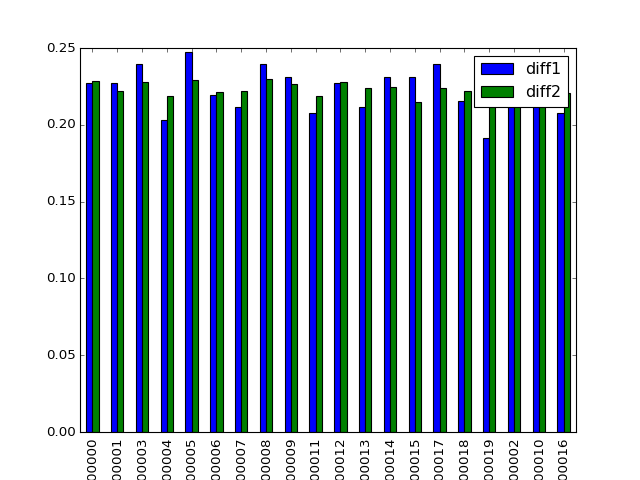

In [29]:
Difficilties.plot(kind='bar')

In [30]:
def Abilities(mat, pblslev):
    df = mat.join(pblslev)
    #print df
    return [df[df[i] > 0 ][pblslev.name].sum() for i in bm]

In [31]:
usrAb = Abilities(bm, Difficilties.diff1)
normalize(usrAb)
usrAb = pd.DataFrame(usrAb, index=bm.columns, columns=['abl1']).T

In [32]:
usrAb2 = Abilities(bm, Difficilties.diff2)
normalize(usrAb2)
usrAb2 = pd.DataFrame(usrAb2, index=bm.columns, columns=['abl2']).T
usrAb = usrAb.append(usrAb2)

<IPython.core.display.Javascript object>


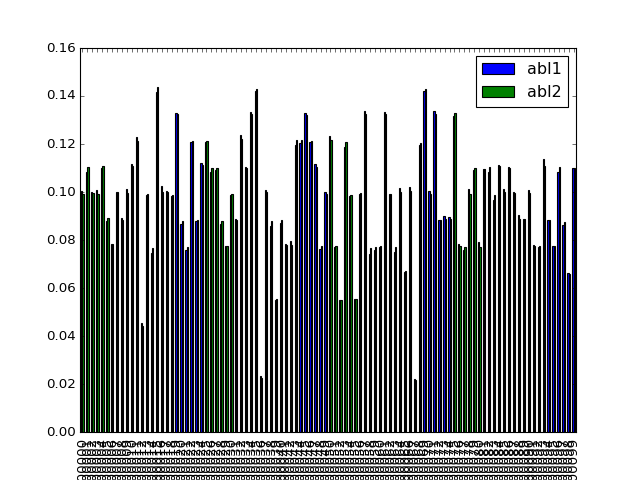

In [33]:
usrAb.T.plot(kind='bar')

In [34]:
bmm = bm.as_matrix()
U, s, V = np.linalg.svd(bmm, full_matrices=False)

In [76]:
U = pd.DataFrame(U, index=bm.index)
diff3 = pd.DataFrame(U[0], index=bm.index)

def f(x):
    return 0.5 - np.abs(x)

diff3 = diff3.apply(f)
diff3

,0
P00000,0.286837
P00001,0.279742
P00003,0.306536
P00004,0.258561
P00005,0.324626
P00006,0.270796
P00007,0.261003
P00008,0.293995
P00009,0.293565
P00011,0.256468


In [79]:
g = Difficilties.join(diff3)
g.sort_values(by='diff2', inplace=True)

<IPython.core.display.Javascript object>


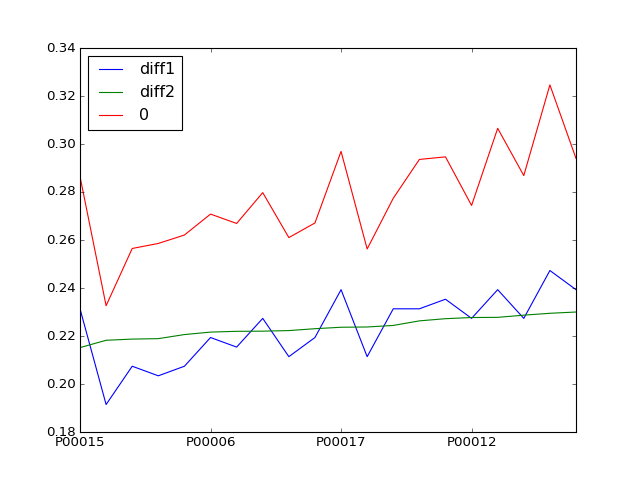

In [80]:
g.plot()

In [38]:
s

array([ 20.33164203,   6.8636432 ,   6.59255034,   6.24224111,
         5.99741041,   5.82105351,   5.53192826,   5.20540096,
         4.96986175,   4.96107647,   4.86340876,   4.5592719 ,
         4.45281027,   4.337622  ,   4.22969528,   3.86486399,
         3.74946052,   3.5637498 ,   3.18886675,   2.89590866])